In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Results dir
results_dir = './results'

# Dictionary to store continents practiced by each participant
data_dict = {}

# Iterate over the files in the directory
for participant_id in os.listdir(results_dir): # participant id is the filename

     # Read the CSV file into a DataFrame
    filepath = os.path.join(results_dir, participant_id)
    df = pd.read_csv(filepath)
    df.insert(1, 'participant_id', participant_id)
    
    # Store the DataFrame in the data_dict dictionary with the participant_id as the key
    data_dict[participant_id] = {'df': df}
    
# Now 'data_dict['participant_id']' contains a df with data of participant 'participant_id'

In [97]:
"""
PLAN

Across participants:
.Boxplot with avg rate of forgetting and how it deviates (with three boxplots on the graph, one per condition), same for rt
.Progression of avg rate of forgetting and avg rt across trials !!! This doesn't say much as across trials the condition changes, and we are instested into how the conditions cause changes !!!

Within participants:
.Add for every participant a key avg_rt, avg_alpha, trials, proportion_correct, proportion_correct_per_condition, proportion_correct_per_condition, avg_rt_per_condition, avg_alpha_per_condition, proportion_correct_per_continent, avg_alpha_per_continent
.what we dont measure is how the rt and alpha of the participant develops throughout the trials of each separate condition. This depends on whether we split the experiment into 3 parts
.Most diffuclt/easy items as reflected by rt and alpha for that participant / plot maybe as we cannot define thresholds of 'best' and 'worst' items
"""

for participant_id, participant_df in data_dict.items():

    # Create a dictionary for the summary statistics
    summary_dict = {
        'avg_rt': participant_df['df']["rt"].mean(),
        'avg_alpha': participant_df['df']["alpha"].mean(),
        'trials': participant_df['df']["trial"].iloc[-1],
        'proportion_correct': participant_df['df']['correct'].value_counts(normalize=True),
        'proportion_correct_per_condition': participant_df['df'].groupby('condition')['correct'].mean(),
        'avg_rt_per_condition': participant_df['df'].groupby('condition')['rt'].mean(),
        'avg_alpha_per_condition': participant_df['df'].groupby('condition')['alpha'].mean(),
        'proportion_correct_per_continent': participant_df['df'].groupby('continent')['correct'].mean(),
        'avg_alpha_per_continent': participant_df['df'].groupby('continent')['alpha'].mean()

        # consider including st.deviation, variance, range
    }

    # Add the summary dictionary to the original dictionary
    data_dict[participant_id]['stats'] = summary_dict

# Now data_dict[participant_id]['df'] contains the dataframe with all the data of the participant_id, and
# data_dict[participant_id]['stats'] contains all the statistics of the participant. To see what 
# statistics are available and how you can access them, see data_dict[participant_id]['stats'].keys().


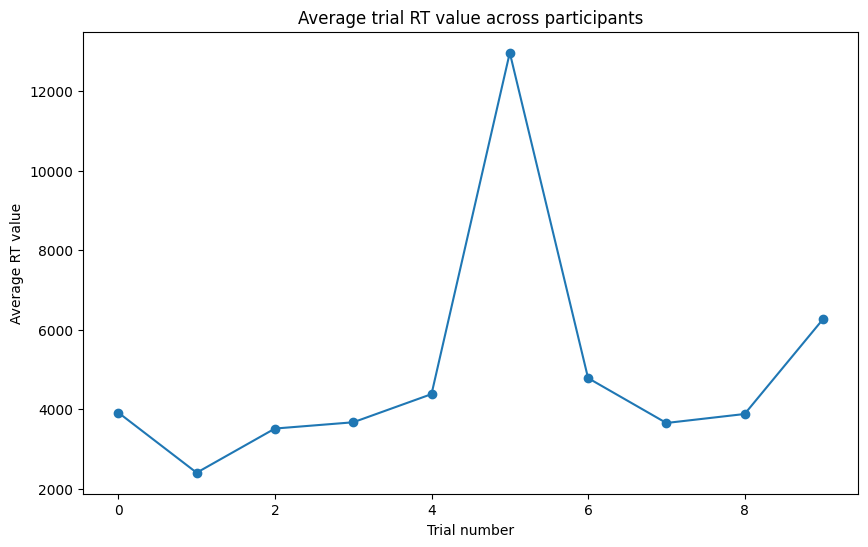

In [98]:
# Concatenate all dfs
all_data = pd.concat([participant_data['df'] for participant_data in data_dict.values()])

# Group by the trial number and calculate the mean of 'rt'
avg_rt_per_trial = all_data.groupby(all_data.index)['rt'].mean()

# Now avg_rt_per_trial is a Series where the index is the trial number and the value is the average 'rt' for that trial

plt.figure(figsize=(10, 6))
avg_rt_per_trial.plot(marker='o')
plt.xlabel('Trial number')
plt.ylabel('Average RT value')
plt.title('Average trial RT value across participants')
plt.show()

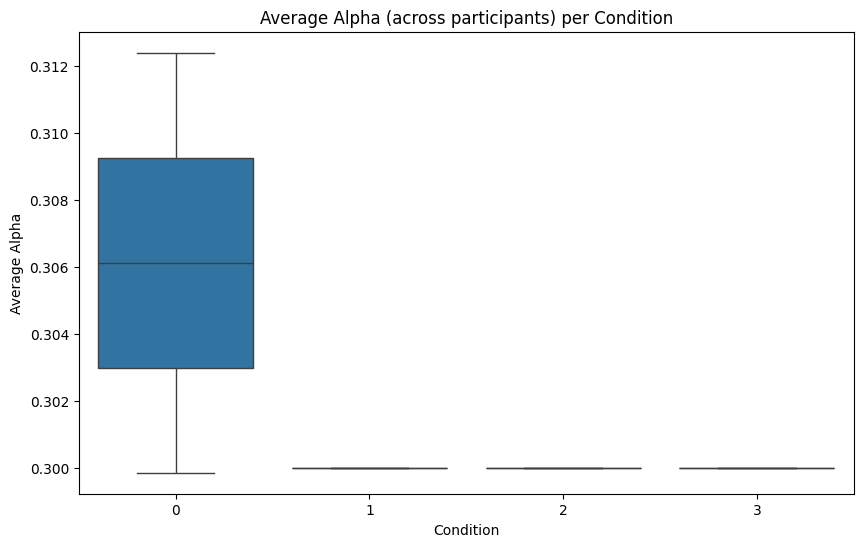

In [99]:
# Create a DataFrame with the average 'alpha' for each condition for each participant
data = []
for participant_id, participant_data in data_dict.items():
    for condition, alpha in participant_data['stats']['avg_alpha_per_condition'].items(): # importantly, participant_data['stats']['avg_alpha_per_condition'] is a dict as ['avg_alpha_per_condition'] is the key and the value is the list containing the avg_alpha of each condition
        data.append({
            'participant_id': participant_id,
            'condition': condition,
            'avg_alpha': alpha
        })
df = pd.DataFrame(data)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='avg_alpha', data=df)

plt.title('Average Alpha (across participants) per Condition')
plt.xlabel('Condition')
plt.ylabel('Average Alpha')

plt.show()

In [100]:
df

,participant_id,condition,avg_alpha
0,20231022112233,0,0.312402
1,20231022112233,1,0.300000
2,20231022112233,2,0.300000
3,20231022112233,3,0.300000
4,20231022112524,0,0.299870
5,20231022112524,1,0.300000
6,20231022112524,2,0.300000
7,20231022112524,3,0.300000


In [101]:
# data_dict.values()
# data_dict['20231022112233']
# data_dict['20231022112233']['df']
# data_dict['20231022112233'].items()
# data_dict['20231022112233']['stats']['avg_rt']
# data_dict['20231022112233']['stats'].keys()
# data_dict['20231022112233'].keys()